You’ve heard of decision trees, right? They help break down decisions step-by-step. Now, what if I told you there’s a way to take those decision trees and make them even more powerful? That’s where Gradient Boosting Algorithms come in!

**The Basic Idea of Gradient Boosting:** Imagine this: you’re learning how to shoot hoops. You miss your first shot, but instead of giving up, you learn from that mistake. The next time, you adjust your angle a bit, and slowly, your shots get better. That’s basically how Gradient Boosting works — it improves by learning from its mistakes!

### **Let’s Meet the Gradient Boosting Family- Introducing XGBoost**

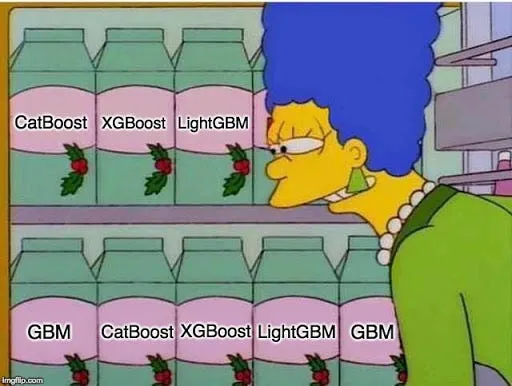

### **XGBoost: The Speedster of the Family 🏎️**
XGBoost stands for “Extreme Gradient Boosting,” and it’s famous for being super-fast and accurate. If you’re dealing with big data and need a speedy algorithm, XGBoost is your go-to.

XGBoost builds a series of trees, where each new tree tries to correct the errors made by the previous ones.
It uses something called regularization, which helps to avoid overfitting.
It’s really fast, flexible, works well with both small and large datasets.

In [1]:
import numpy as np

# Decision stump used as weak classifier
class DecisionStump:
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def predict(self, X):
        predictions = np.ones(X.shape[0])
        feature_values = X[:, self.feature_idx]
        predictions[feature_values <= self.threshold] = self.left_value
        predictions[feature_values > self.threshold] = self.right_value
        return predictions

class XGBoost:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)

        for _ in range(self.n_estimators):
            residuals = y - predictions
            
            # Train a weak learner on residuals
            stump = DecisionStump()
            min_error = float("inf")

            for feature_i in range(X.shape[1]):
                feature_values = X[:, feature_i]
                thresholds = np.unique(feature_values)

                for threshold in thresholds:
                    left_value = np.mean(residuals[feature_values <= threshold])
                    right_value = np.mean(residuals[feature_values > threshold])

                    stump_predictions = np.where(feature_values <= threshold, left_value, right_value)
                    error = np.sum((residuals - stump_predictions) ** 2)

                    if error < min_error:
                        min_error = error
                        stump.feature_idx = feature_i
                        stump.threshold = threshold
                        stump.left_value = left_value
                        stump.right_value = right_value

            # Update predictions
            predictions += self.learning_rate * stump.predict(X)

            # Save the trained stump
            self.trees.append(stump)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for stump in self.trees:
            y_pred += self.learning_rate * stump.predict(X)
        return np.sign(y_pred)


In [3]:

# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

    # Load dataset
    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    # Convert targets to {-1, 1} for binary classification
    y[y == 0] = -1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

    # XGBoost classification with 10 weak classifiers
    clf = XGBoost(n_estimators=10, learning_rate=0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy(y_test, y_pred)
    print("Accuracy:", acc)


Accuracy: 0.9385964912280702
